In [6]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [7]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [8]:
# Read the city data file and store in a DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [11]:
# Read the ride data file and store in a DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#Set Index to Type
pyber_types = pyber_data_df.set_index(["type"])
pyber_types

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [15]:
#Total Rides, Drivers, and Fares
rides_summary = pyber_types.groupby(["type"]).count()["ride_id"]
rides_summary.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [16]:
drivers_summary = pyber_types.groupby(["type"]).sum()["driver_count"]
drivers_summary.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [17]:
fare_summary = pyber_types.groupby(["type"]).sum()["fare"]
fare_summary.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
# Rename Columns and Format
pyber_type_summary_df = pd.DataFrame({"Total Rides": rides_summary, 
                                     "Total Drivers": drivers_summary, 
                                     "Total Fares": fare_summary.map("${:,.2f}".format),
                                     "Average Fare per Ride": (fare_summary/rides_summary).map("${:,.2f}".format),
                                    "Average Fare per Driver": (fare_summary/drivers_summary).map("${:,.2f}".format)})

#Delete Index
pyber_type_summary_df.index.name = None

#Display
pyber_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [19]:
#Rename columns in merged dataframe
pyber_renamed=pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

pyber_renamed.head(5)

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
#Set Index to Date Columns
pyber_dates = pyber_renamed.set_index(["Date"])
pyber_dates.head(5)

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [21]:
pyber_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride Id      2375 non-null   int64  
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [26]:

#Create a new DataFrame for fares and include only the Date, City Type, and Fare columns using the copy() method on the merged DataFrame.
pyber_copy=pyber_renamed.copy()
date_formatted=pd.to_datetime(pyber_copy["Date"]) 
datetime_index = pd.DatetimeIndex(date_formatted.values)
pyber_copy2=pyber_copy.set_index(datetime_index)
pyber_copy2

,City,Date,Fare,Ride Id,No. Drivers,City Type
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2019-05-07 19:22:15,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [34]:
pyber_copy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Date         2375 non-null   object 
 2   Fare         2375 non-null   float64
 3   Ride Id      2375 non-null   int64  
 4   No. Drivers  2375 non-null   int64  
 5   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [36]:
#Remove Date Column
pyber_formatted=pyber_copy2.drop(columns=["Date"])
pyber_formatted.index.name = "Date"
pyber_formatted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride Id      2375 non-null   int64  
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [37]:
fare_date_summary = pyber_formatted.groupby(["Date", "City Type"]).sum()["Fare"]
fare_date_summary.head()

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
Name: Fare, dtype: float64

In [38]:
# Rename Columns and Format
pyber_date_summary_df = pd.DataFrame({"Total Fares": fare_date_summary})
pyber_date_summary_df

,,Total Fares
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [39]:
#Pivot on City Type
type_pivot=pd.pivot_table(pyber_date_summary_df,values=["Total Fares"], index=["Date"], columns=['City Type'],aggfunc=np.sum)
type_pivot

Total Fares                
City Type                 Rural Suburban  Urban
Date                                           
2019-01-01 00:08:16         NaN      NaN  37.91
2019-01-01 00:46:46         NaN    47.74    NaN
2019-01-01 02:07:24         NaN    24.07    NaN
2019-01-01 03:46:50         NaN      NaN   7.57
2019-01-01 05:23:21         NaN      NaN  10.75
...                         ...      ...    ...
2019-05-08 04:20:00         NaN      NaN  21.99
2019-05-08 04:39:49         NaN      NaN  18.45
2019-05-08 07:29:01         NaN      NaN  18.55
2019-05-08 11:38:35         NaN      NaN  19.77
2019-05-08 13:10:18         NaN      NaN  18.04

[2375 rows x 3 columns]

In [40]:
#Limit values using loc
sample_dates = type_pivot.loc['2019-01-01':'2019-04-28']
sample_dates

Total Fares                
City Type                 Rural Suburban  Urban
Date                                           
2019-01-01 00:08:16         NaN      NaN  37.91
2019-01-01 00:46:46         NaN    47.74    NaN
2019-01-01 02:07:24         NaN    24.07    NaN
2019-01-01 03:46:50         NaN      NaN   7.57
2019-01-01 05:23:21         NaN      NaN  10.75
...                         ...      ...    ...
2019-04-28 14:28:36         NaN      NaN  11.46
2019-04-28 16:29:16         NaN      NaN  36.42
2019-04-28 17:26:52         NaN      NaN  31.43
2019-04-28 17:38:09         NaN    34.87    NaN
2019-04-28 19:35:03         NaN    16.96    NaN

[2196 rows x 3 columns]

In [41]:
#Resample to weekly buckets
resample_dates=sample_dates.resample('7D').sum()
resample_dates

Total Fares                  
City Type        Rural Suburban    Urban
Date                                    
2019-01-01      187.92   876.61  1879.70
2019-01-08      139.80  1080.40  2193.36
2019-01-15      233.85  1163.93  2105.90
2019-01-22      210.94  1285.13  1846.98
2019-01-29      361.50  1079.58  2085.77
2019-02-05       81.91   879.92  2200.85
2019-02-12      140.52  1394.86  2389.68
2019-02-19      448.07  1067.99  2156.88
2019-02-26       75.65   836.61  2619.82
2019-03-05      353.76   842.28  2240.19
2019-03-12      187.63  1096.89  1971.72
2019-03-19      126.07  1029.66  2495.15
2019-03-26      292.06  1061.82  1970.03
2019-04-02      453.42  1034.28  2101.04
2019-04-09      214.60   821.52  2579.51
2019-04-16      271.87  1144.27  2329.98
2019-04-23      134.12  1187.59  1899.22

No handles with labels found to put in legend.


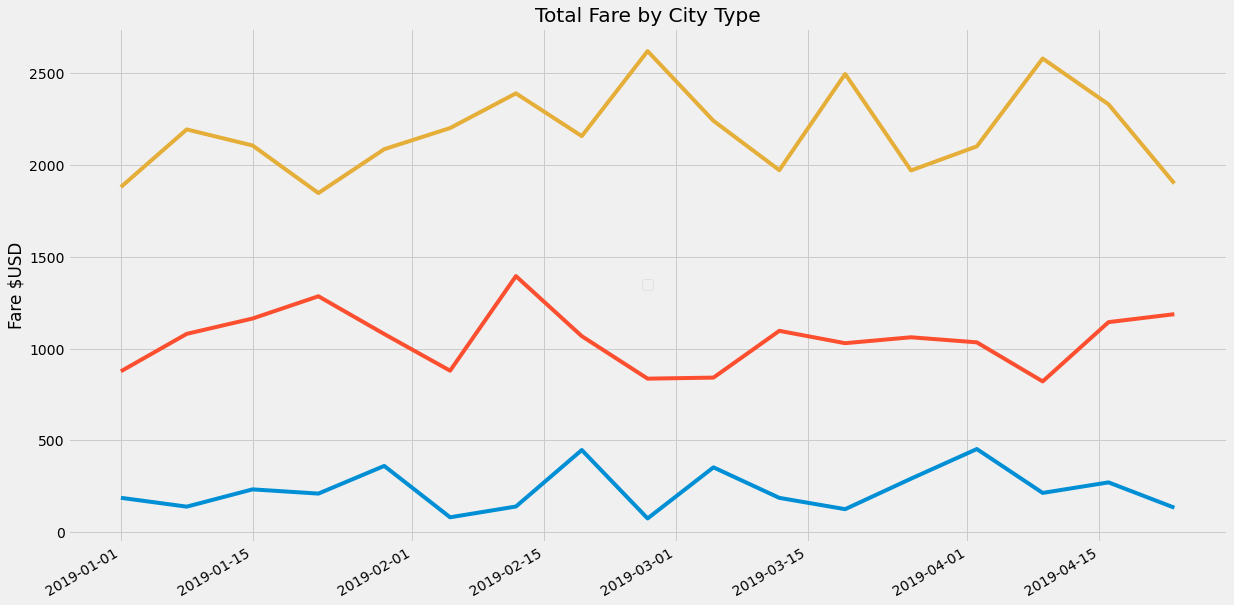

In [42]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
#ax.plot(resample_dates)
fig.set_size_inches(18.5, 10.5)
ax.plot(resample_dates)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('')
plt.ylabel('Fare $USD')
plt.legend(loc="center")
plt.title("Total Fare by City Type")
plt.savefig("analysis/Challenge.png")
plt.show()